In [16]:
%matplotlib inline

In [17]:
from amptools.io.geonet.core import read_geonet, _read_velocity
from amptools.stream import get_spectral, streams_to_dataframe
from amptools.table import dataframe_to_xml
import os.path
import glob
import warnings

# API Tutorial
What follows is a brief introduction to the methods found in the amptools API. This code was designed mostly to serve the purposes of the ShakeMap http://usgs.github.io/shakemap/ software, but the reader functions for the various strong motion data formats might be used in a broader context. 

Each io package (amptools.io.FORMAT) has a module called core.py, in which are implemented two methods: is_FORMAT and read_FORMAT. These functions all behave the same, so we'll use the geonet format as an example, since the data are readily available on the GNS FTP site (<ftp://ftp.geonet.org.nz/strong/processed/Proc/>).

In [18]:
datafile = os.path.join(os.getcwd(),'..','tests','data','geonet','20161113_110259_WTMC_20.V1A')
stream = read_geonet(datafile)

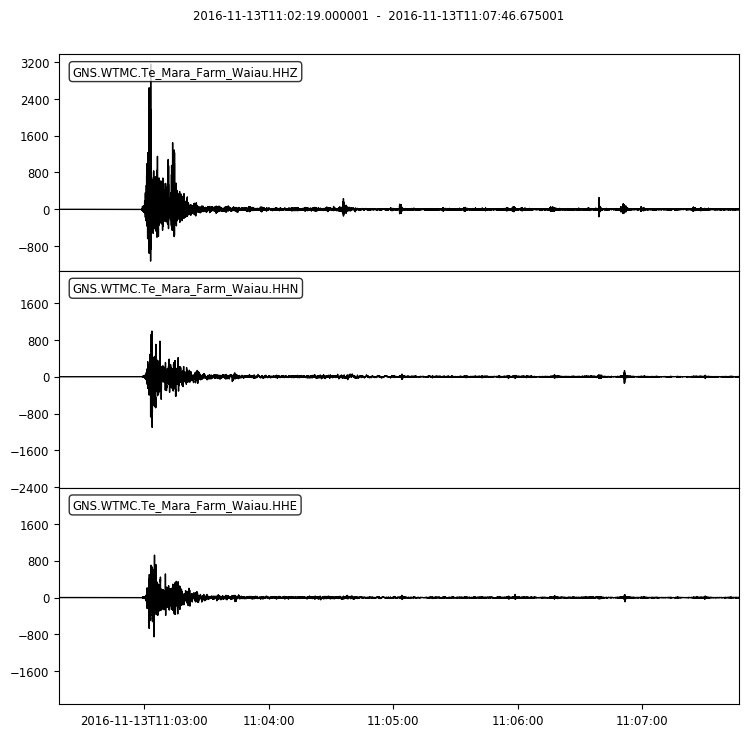

In [19]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore") #matplotlib warning is distracting
    stream.plot()

Each read_FORMAT function takes in a file name, and returns an ObsPy Stream (<https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.html>) object.  A Stream object can contain many Trace objects (<https://docs.obspy.org/packages/autogen/obspy.core.trace.Trace.html>).  Our Stream objects generally contain three Traces, one for each channel.  The channels will be named either 'H1'/'H2'/'HZ' or 'HHE'/'HHN'/'HHZ'. The Trace objects are accessed by accessing the elements of the Stream object, like so:

In [20]:
HHZ = stream[0]
HHN = stream[1]
HHE = stream[2]

Trace and Stream objects have a number of useful methods, like plot() above. See the links above for the full list.

*amptools* also has a method to calculate pseudo-spectral accelerations, called *get_spectral()* 

In [21]:
psa_03,psa_10,psa_30 = get_spectral(HHZ,HHZ.stats['sampling_rate'])

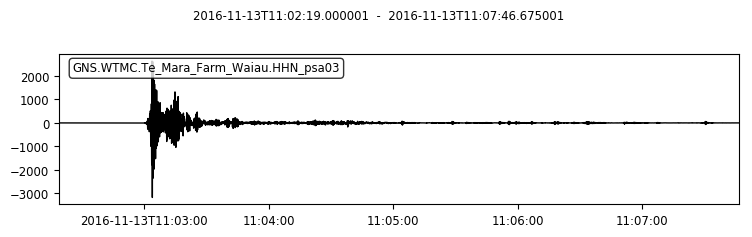

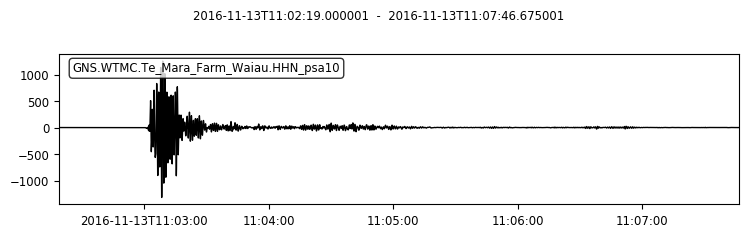

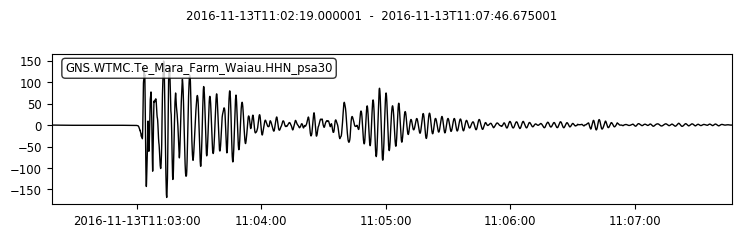

In [22]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore") #matplotlib warning is distracting
    psa_03.plot()
    psa_10.plot()
    psa_30.plot()

Finally, a method that may be of general interest is *streams_to_dataframe()*, which takes a sequence of Stream objects and turns them into a pandas DataFrame object.

In [23]:
streams = []
datafiles = glob.glob(os.path.join(os.getcwd(),'..','tests','data','geonet','*.V1A'))
for dfile in datafiles:
    stream = read_geonet(dfile)
    streams.append(stream)


In [24]:
len(streams)

3

In [25]:
dataframe,spectral_streams = streams_to_dataframe(streams)

Below we'll display a subset of the columns.  All acceleration values are in %g, and pgv is in cm/s.

In [26]:
dataframe[['station','network','lat','lon','HHE']]

station network        lat         lon        HHE                         \
                                                pga        pgv       psa03   
0    WTMC     GNS -41.380556  173.053611  94.140940  75.735943  315.848474   
1    HSES     GNS -41.476667  172.830556  26.373829  31.568481   91.831786   
2     THZ     GNS -40.237500  172.905278   4.090510  12.155122   10.771202   

                         
       psa10      psa30  
0  84.142837  13.663699  
1  41.722863  12.549863  
2   8.046830   3.163074